In [1]:
import pandas as pd  # Pandas proporciona estructuras de datos y herramientas para el análisis de datos.
import seaborn as sns  # Seaborn es una biblioteca de visualización de datos basada en matplotlib.
import matplotlib.pyplot as plt  # Matplotlib es una biblioteca de gráficos 2D que produce figuras de calidad de publicación.
from pathlib import Path  # Pathlib ofrece clases para manejar rutas de archivos de manera orientada a objetos.
import os  # La biblioteca os permite interactuar con el sistema operativo.

In [2]:
s_path = Path.cwd()  # Obtiene el directorio de trabajo actual como un objeto Path.
s_prt_path = s_path.parent  # Accede al directorio padre del directorio actual.
ruta_csv = os.path.join(s_prt_path,'Data_XM.csv')  # Crea una ruta al archivo CSV en el directorio padre.
df_DataModel= pd.read_csv(ruta_csv)  # Lee el archivo CSV en un DataFrame de pandas.


In [3]:
df_DataModel['Date'] = pd.to_datetime(df_DataModel['Date'])  # Convierte la columna 'Date' a tipo datetime.
df_DataModel.drop('Unnamed: 0', axis=1, inplace=True)  # Elimina la columna 'Unnamed: 0'.

In [4]:
df_DataModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3013 non-null   datetime64[ns]
 1   Demanda    3013 non-null   float64       
 2   VolUtil    3013 non-null   float64       
 3   Aportes    3013 non-null   float64       
 4   PrecioB    3013 non-null   float64       
 5   PrecioO    3013 non-null   float64       
 6   DispTer    3013 non-null   float64       
 7   DispNoTer  3013 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 188.4 KB


In [5]:
ncol = len(df_DataModel.columns)  # Calcula el número de columnas en el DataFrame.
name_column = list(df_DataModel.columns)  # Crea una lista con los nombres de las columnas.
print(ncol)  # Imprime el número de columnas.
print(name_column)  # Imprime la lista de nombres de columnas.

8
['Date', 'Demanda', 'VolUtil', 'Aportes', 'PrecioB', 'PrecioO', 'DispTer', 'DispNoTer']


In [6]:
ylabels = [
    'Demanda [kWh-día]',
    'Volumen Útil [kWh-día]',
    'Aportes [kWh-día]',
    'Precio de Bolsa [$/kWh-día]',
    'Precio de Oferta [$/kWh-día]',
    'Disponibilidad Térmica [kWh-día]',
    'Disponibilidad No Térmica [kWh-día]'
]

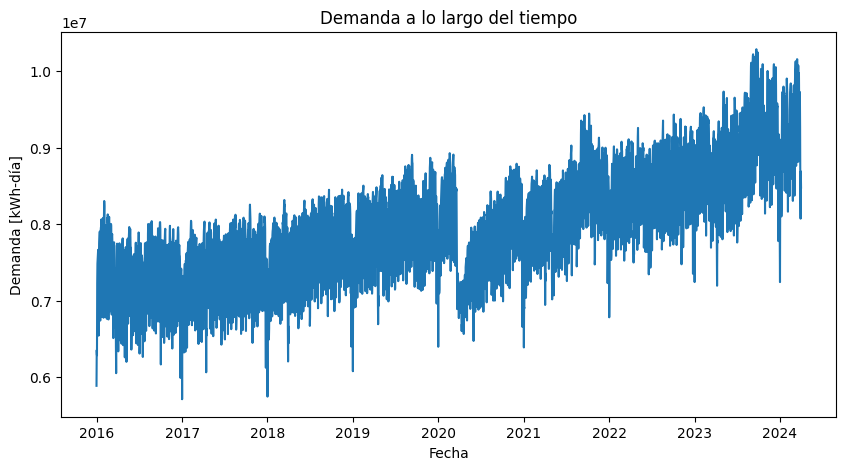

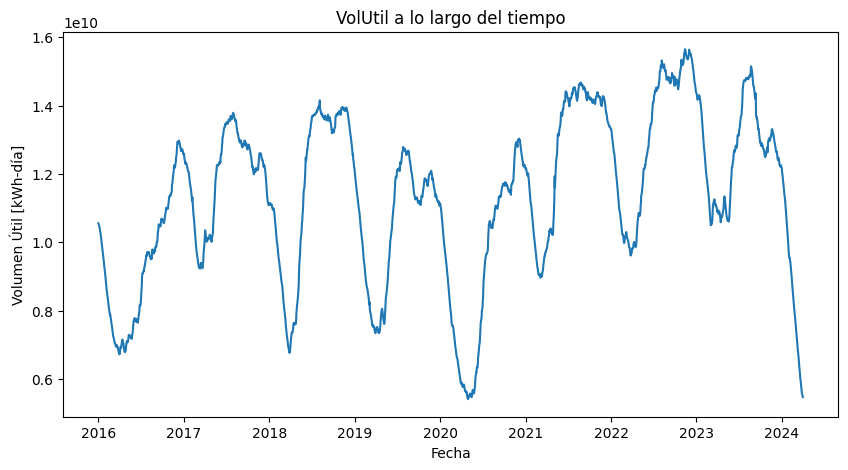

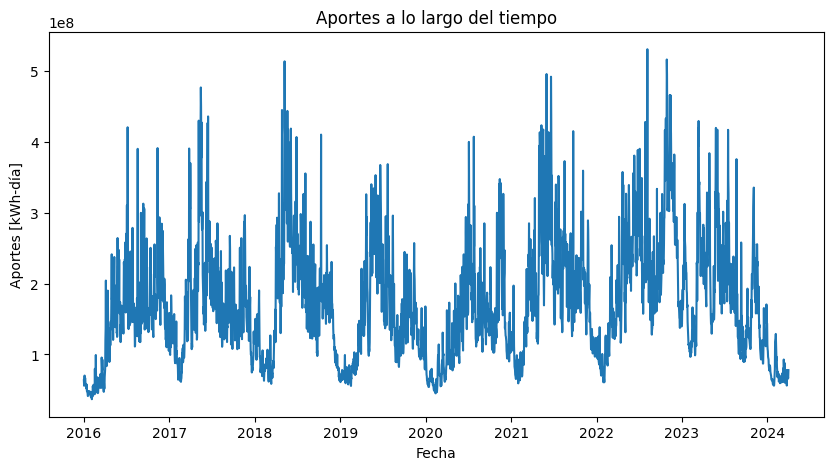

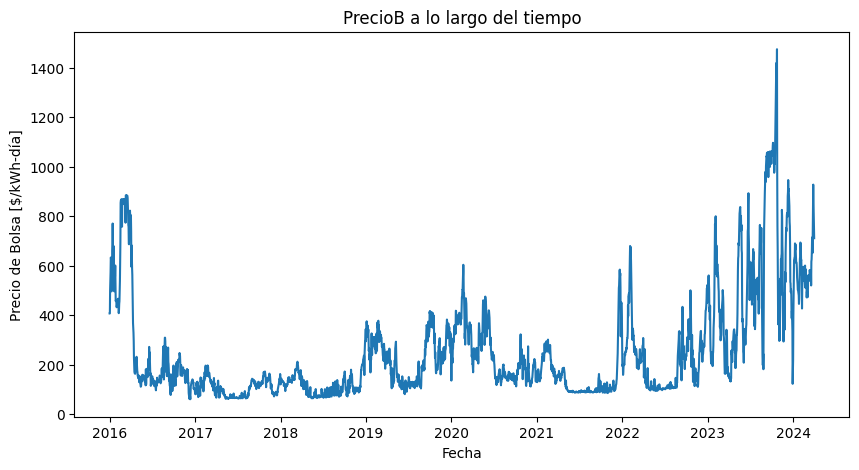

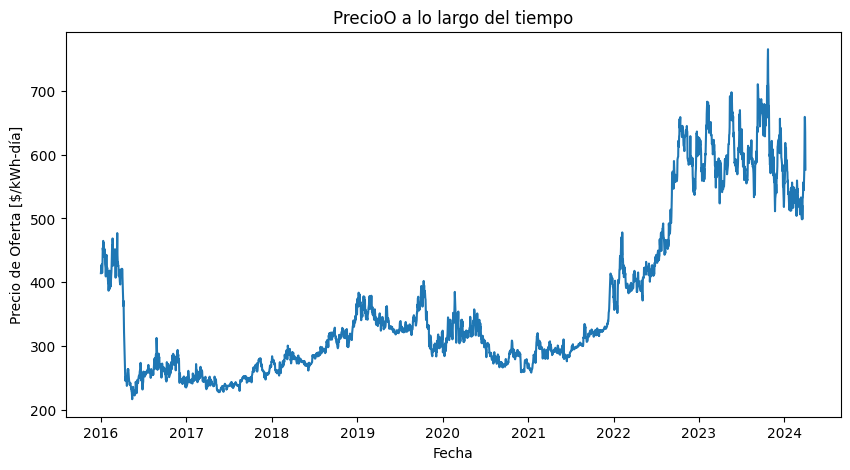

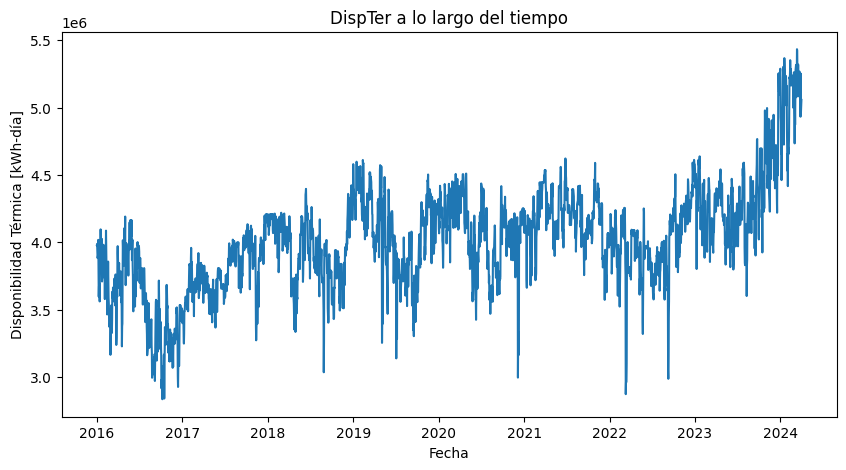

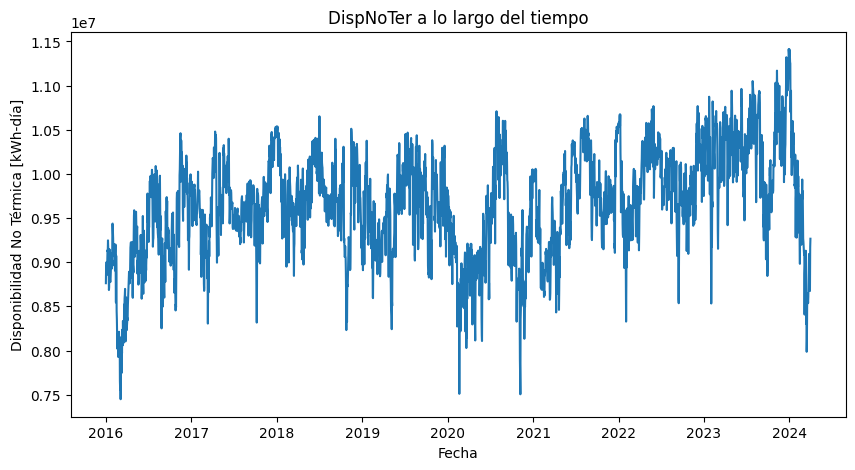

In [7]:
for i in range(1,ncol):
    plt.figure(figsize=(10, 5))  # Configurar el tamaño del gráfico
    sns.lineplot(data=df_DataModel, x='Date', y=df_DataModel.columns[i])
    plt.title(f'{df_DataModel.columns[i]} a lo largo del tiempo')  # Título del gráfico
    plt.xlabel('Fecha')  # Etiqueta del eje X
    plt.ylabel(ylabels[i-1])  # Etiqueta del eje Y correspondiente de la lista 'ylabels'
    plt.show()  # Mostrar el gráfico

In [8]:
df_DataModel.describe()

,Date,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer
count,3013,3.013000e+03,3.013000e+03,3.013000e+03,3013.000000,3013.000000,3.013000e+03,3.013000e+03
mean,2020-02-15 00:00:00,8.152133e+06,1.132937e+10,1.716884e+08,251.068241,365.120707,4.017099e+06,9.662080e+06
min,2016-01-01 00:00:00,5.710414e+06,5.405008e+09,3.678070e+07,61.172760,216.628100,2.833833e+06,7.448813e+06
25%,2018-01-23 00:00:00,7.663596e+06,9.743105e+09,1.107629e+08,112.818297,275.364668,3.779562e+06,9.263221e+06
50%,2020-02-15 00:00:00,8.116733e+06,1.165116e+10,1.591843e+08,167.106393,317.569633,4.025104e+06,9.702225e+06
75%,2022-03-09 00:00:00,8.689481e+06,1.326642e+10,2.194087e+08,309.748850,416.756078,4.228167e+06,1.008717e+07
max,2024-03-31 00:00:00,1.028906e+07,1.564980e+10,5.304498e+08,1474.681288,765.351694,5.433451e+06,1.141142e+07
std,NaN,7.784784e+05,2.448261e+09,8.207545e+07,210.665026,124.950009,3.853341e+05,5.962453e+05


In [13]:
from sklearn.preprocessing import MinMaxScaler  # Importa la clase MinMaxScaler para la normalización de datos.

In [14]:
df_DataModelAnalisis = df_DataModel[name_column[1::]]  # Crea un nuevo DataFrame con columnas seleccionadas.

In [15]:
df_DataModelAnalisis.head()

,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer
0,5.885745e+06,1.055541e+10,63496200.0,407.565972,414.206983,3.978219e+06,8.762403e+06
1,6.352403e+06,1.053737e+10,55776100.0,407.627913,418.642247,3.987585e+06,8.949453e+06
2,6.285871e+06,1.052841e+10,61744800.0,499.329203,426.290040,3.930220e+06,8.916347e+06
3,7.226923e+06,1.050766e+10,70137500.0,535.140967,414.717455,3.882154e+06,9.002401e+06
4,7.485122e+06,1.047468e+10,64121400.0,573.129733,427.959078,3.891292e+06,8.855396e+06


In [16]:
# Inicializamos el escalador MinMaxScaler con el rango deseado de 0 a 1.
MinMax = MinMaxScaler(copy=True, feature_range=(0, 1))

# Obtenemos los nombres de las columnas del DataFrame para su uso posterior.
nombres = df_DataModelAnalisis.columns

# Aplicamos la transformación MinMax a los datos para normalizarlos.
Datos_Min_Max = MinMax.fit_transform(df_DataModelAnalisis)

# Convertimos el array resultante en un DataFrame y asignamos los nombres de las columnas originales.
Datos_Min_Max = pd.DataFrame(Datos_Min_Max, columns = nombres)


In [17]:
Datos_Min_Max.head(10)

,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer
0,0.038293,0.502733,0.054116,0.245059,0.360070,0.440213,0.331496
1,0.140214,0.500973,0.038478,0.245103,0.368153,0.443816,0.378700
2,0.125683,0.500098,0.050568,0.309978,0.382090,0.421749,0.370346
3,0.331213,0.498073,0.067569,0.335313,0.361000,0.403260,0.392062
4,0.387605,0.494854,0.055383,0.362189,0.385132,0.406775,0.354964
5,0.399845,0.491764,0.060234,0.404866,0.361524,0.411455,0.365206
6,0.409627,0.488795,0.059778,0.402095,0.361787,0.455327,0.398514
7,0.426899,0.483539,0.040789,0.372177,0.389615,0.375951,0.425691
8,0.351386,0.479291,0.044060,0.308150,0.432279,0.293002,0.422051
9,0.181713,0.476021,0.038328,0.333813,0.425102,0.322378,0.453868


In [18]:
df_DataModel.head(10)

,Date,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer
0,2016-01-01,5.885745e+06,1.055541e+10,63496200.0,407.565972,414.206983,3.978219e+06,8.762403e+06
1,2016-01-02,6.352403e+06,1.053737e+10,55776100.0,407.627913,418.642247,3.987585e+06,8.949453e+06
2,2016-01-03,6.285871e+06,1.052841e+10,61744800.0,499.329203,426.290040,3.930220e+06,8.916347e+06
3,2016-01-04,7.226923e+06,1.050766e+10,70137500.0,535.140967,414.717455,3.882154e+06,9.002401e+06
4,2016-01-05,7.485122e+06,1.047468e+10,64121400.0,573.129733,427.959078,3.891292e+06,8.855396e+06
5,2016-01-06,7.541161e+06,1.044303e+10,66516300.0,633.454963,415.004776,3.903458e+06,8.895982e+06
6,2016-01-07,7.585950e+06,1.041261e+10,66291100.0,629.537537,415.149078,4.017509e+06,9.027968e+06
7,2016-01-08,7.665034e+06,1.035877e+10,56916800.0,587.248523,430.419115,3.811161e+06,9.135660e+06
8,2016-01-09,7.319285e+06,1.031524e+10,58531700.0,496.745422,453.829644,3.595526e+06,9.121233e+06
9,2016-01-10,6.542415e+06,1.028174e+10,55702100.0,533.020900,449.891662,3.671894e+06,9.247313e+06


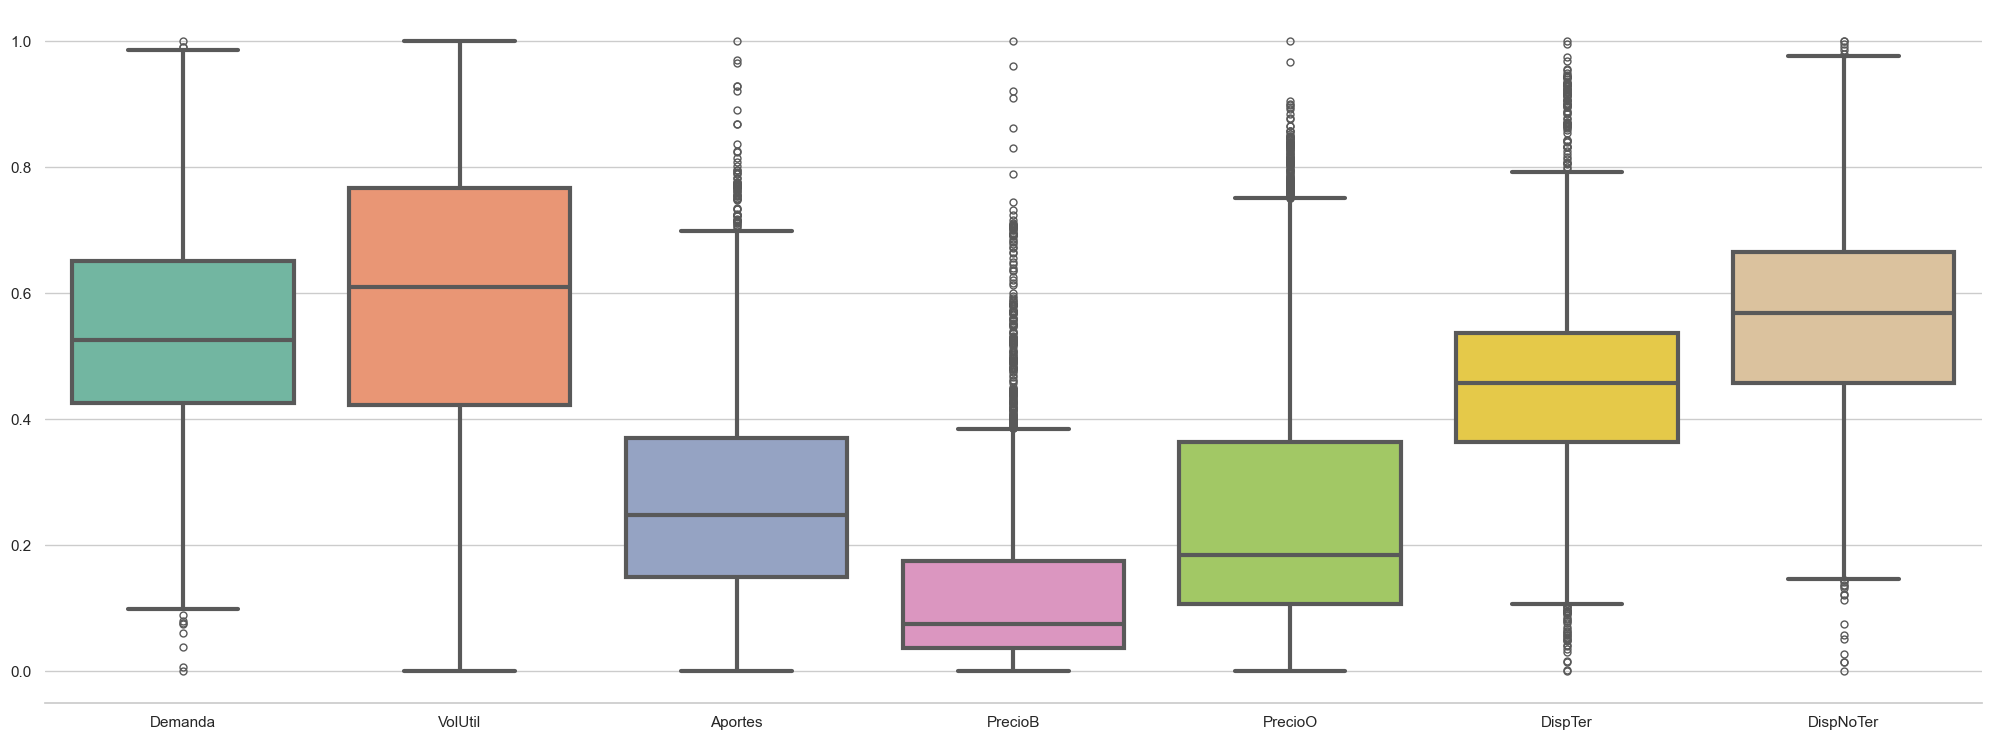

In [19]:
# Configuramos el tamaño de la figura para los gráficos de Seaborn.
sns.set(rc={'figure.figsize':(25,9)})

# Establecemos el estilo del gráfico a 'whitegrid' para un fondo con rejilla blanca.
sns.set(style="whitegrid")

# Creamos un boxplot de los datos normalizados con un ancho de línea específico y una paleta de colores.
sns.boxplot(data = Datos_Min_Max, linewidth = 3, palette="Set2", fliersize = 5)

# Eliminamos el borde izquierdo del gráfico para un estilo más limpio.
sns.despine(left=True)


In [20]:
Features = Datos_Min_Max  # Asigna el DataFrame normalizado a una nueva variable llamada Features.

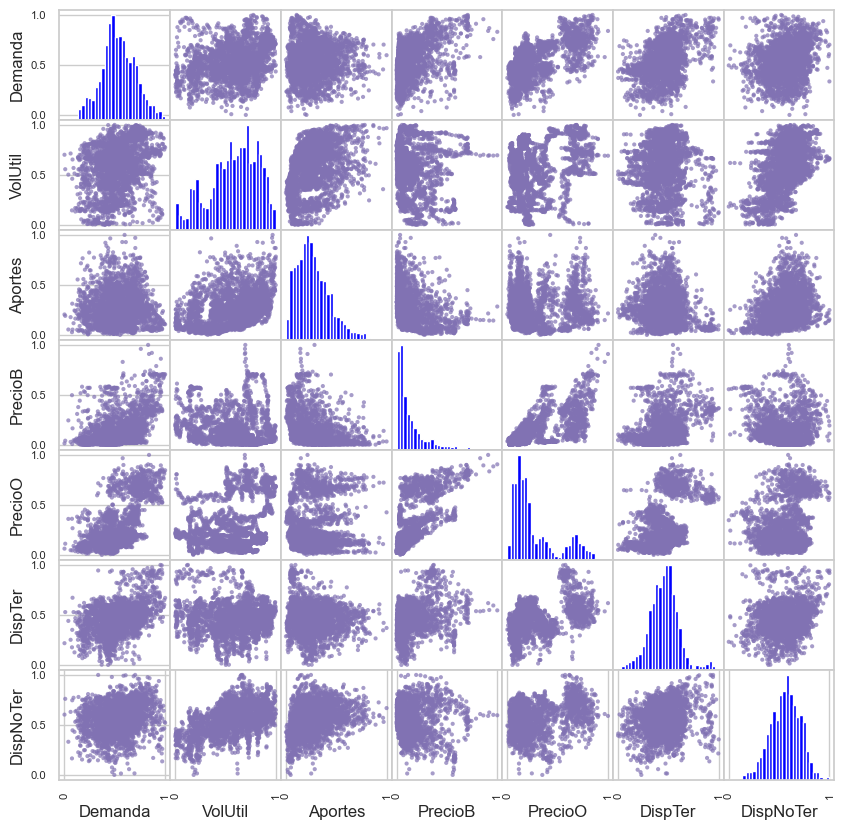

In [22]:
# Creamos una matriz de gráficos de dispersión e histogramas para visualizar las relaciones entre características.
pd.plotting.scatter_matrix(Features, 
                           alpha=0.7, 
                           figsize=(10,10), 
                           range_padding = 0.1, 
                           diagonal='hist',
                           color = 'm', 
                           hist_kwds = {'bins':30, 'color':'blue'})
# Mostramos los gráficos generados.
plt.show()


,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer
Demanda,1.000000,0.305388,0.027701,0.425948,0.632697,0.437424,0.226221
VolUtil,0.305388,1.000000,0.371338,-0.151569,0.235771,-0.012399,0.514875
Aportes,0.027701,0.371338,1.000000,-0.350103,0.051238,-0.113915,0.327116
PrecioB,0.425948,-0.151569,-0.350103,1.000000,0.699750,0.318973,-0.121251
PrecioO,0.632697,0.235771,0.051238,0.699750,1.000000,0.438952,0.294584


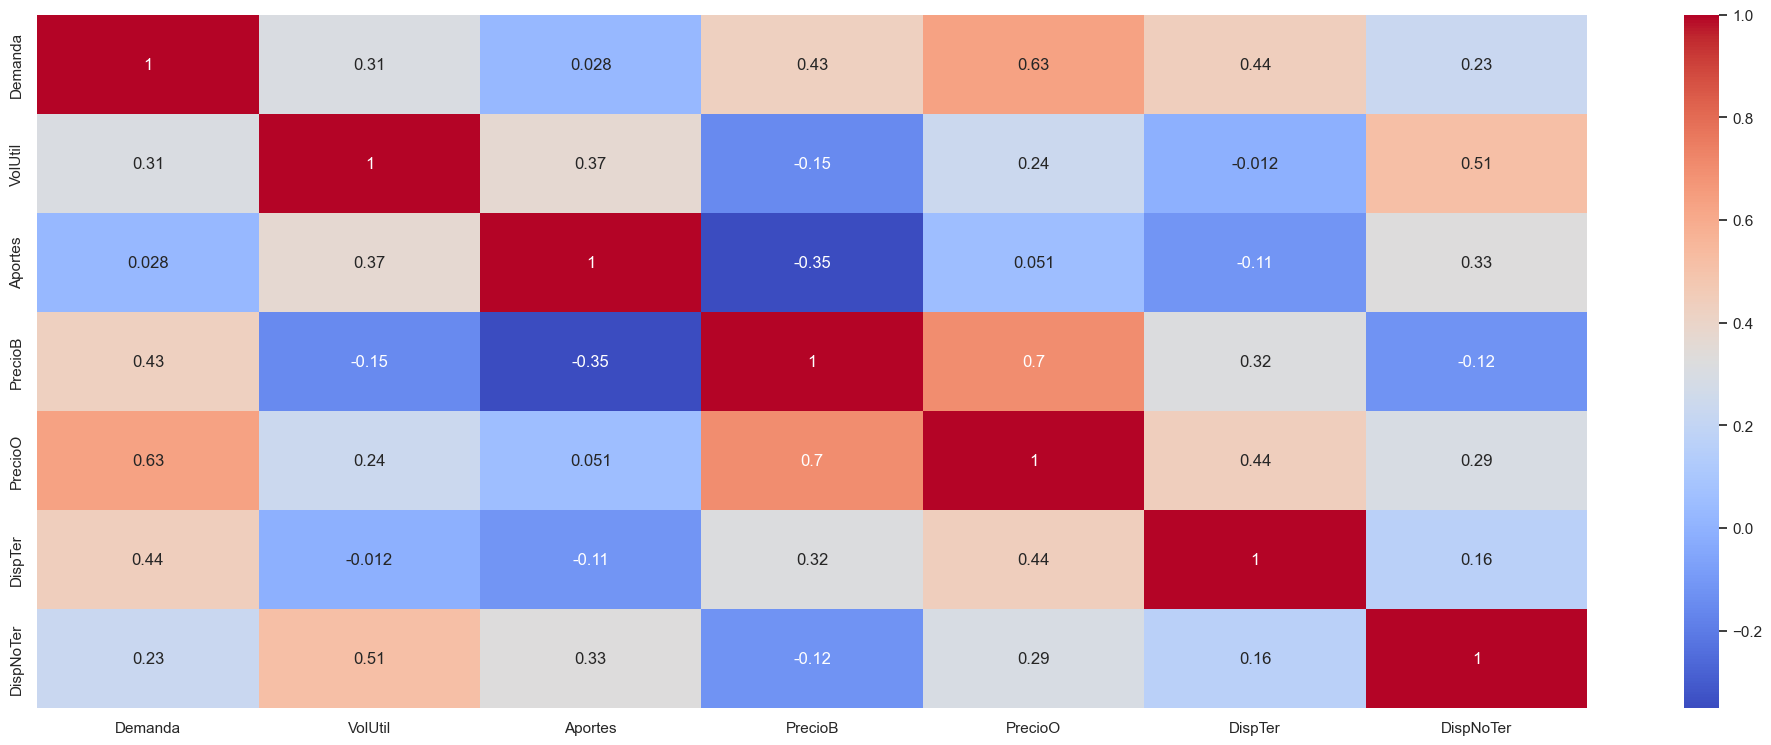

In [23]:
# Calculamos la matriz de correlación del DataFrame 'Features'.
matriz_corr = Features.corr()

# Creamos un mapa de calor utilizando Seaborn para visualizar la matriz de correlación.
sns.heatmap(Features.corr(), annot=True, cmap='coolwarm')

# Mostramos las primeras filas de la matriz de correlación para una inspección rápida.
matriz_corr.head()